In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../data/perturb/clustered_mean_gene_expression_figs2-4.csv", sep=",", index_col=0, low_memory=False)
df = df.iloc[2:, 1:].T

# compute correlation of expression
corr_df = df.corr()
corr = pd.DataFrame(corr_df.values.reshape(-1))
corr[1] = list(corr_df.index) * 2319
corr[2] = np.repeat(list(corr_df.index), 2319)

In [3]:
# map to data index
gene = pd.read_csv("../../result/data/genes_gene_perturb", header=None)
gene_dict = gene.reset_index().set_index(0)['index'].to_dict()
corr[1] = corr[1].map(gene_dict)
corr[2] = corr[2].map(gene_dict)

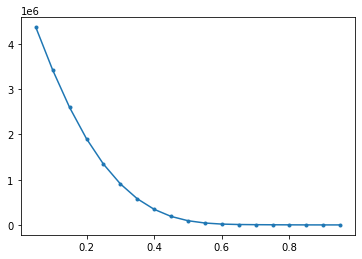

In [4]:
result = []
for ii in np.arange(0.05, 1, 0.05):
    sub_corr = corr.loc[corr[0].abs()>ii, [1, 2]] # threshold based on R2 of expression
    result.append(sub_corr.shape[0])
plt.plot(np.arange(0.05, 1, 0.05), result, ".-")

In [5]:
sub_corr = corr.loc[corr[0].abs()>0.5, [1, 2]] # threshold based on R2 of expression
sub_corr = sub_corr[sub_corr[1] != sub_corr[2]] # remove self loop

In [6]:
sub_corr.to_csv("../../result/network/CoExpr_data_0.5.tsv", sep="\t", header=False, index=False)